In [1]:
import sys
sys.path.insert(0, "/Users/yhhan/git/aiclass/0.Professor/")

import tensorflux.graph as tfg
import tensorflux.deep_learning_networks as tfn
import tensorflux.enums as tfe
import datasource.mnist as mnist
import tensorflux.functions as tff
import math

input_size = 784
hidden_layer1_size = 128
hidden_layer2_size = 128
output_size = 10
batch_size = 1000

x = tfg.Placeholder(name="x")
target = tfg.Placeholder(name="target")

n = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=10,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.SGD.value,
    learning_rate=0.01
)

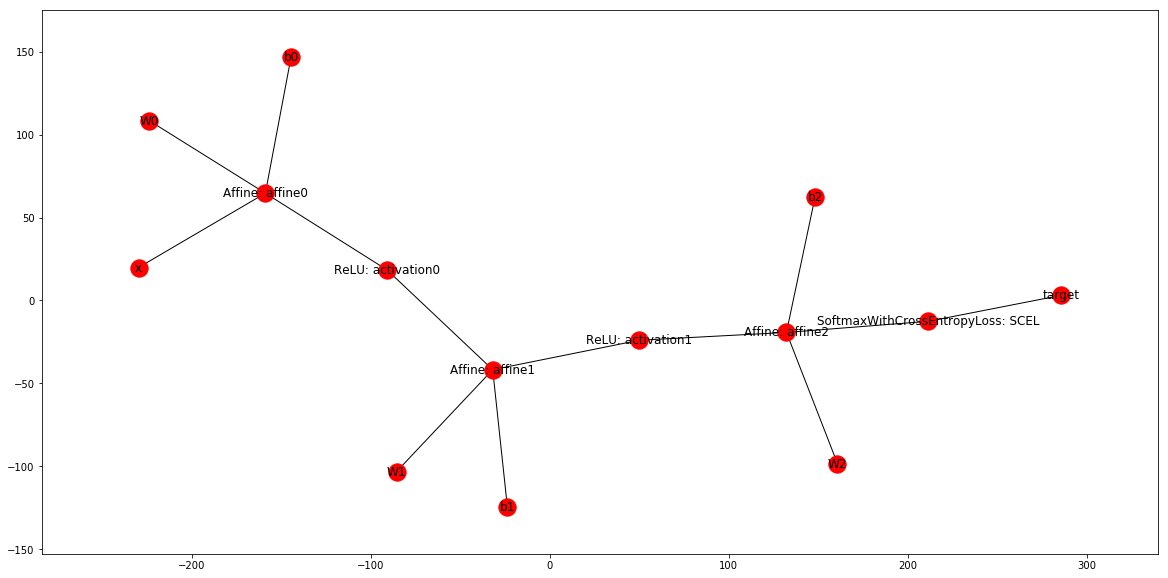

In [2]:
n.draw_and_show(figsize=(20, 10))

In [ ]:
data = mnist.MNIST_Data()

Initial Accuracy 0.1008


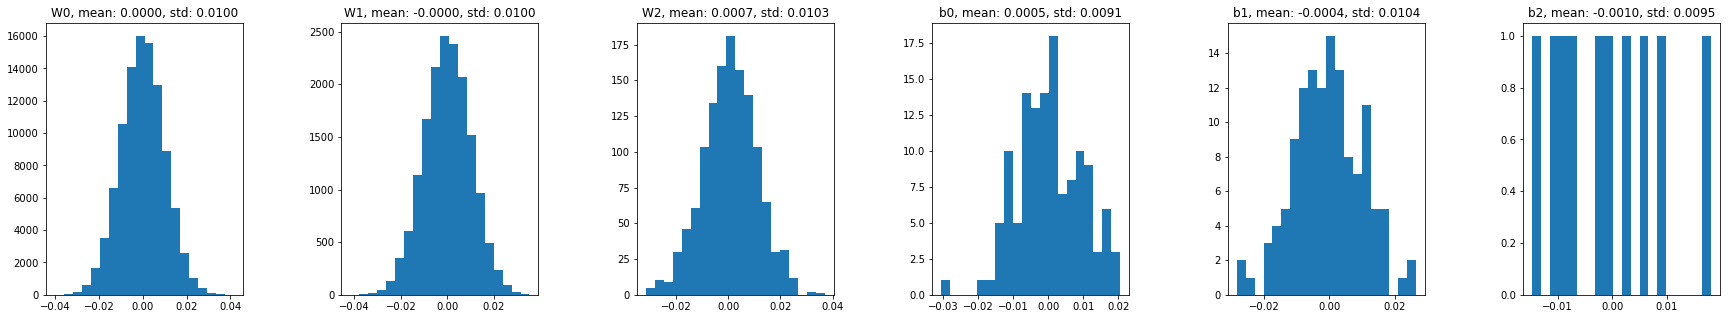

Epoch   0 Completed - Train Error: 0.436561 - Validation Error: 0.404391 - Test Accuracy: 0.877400


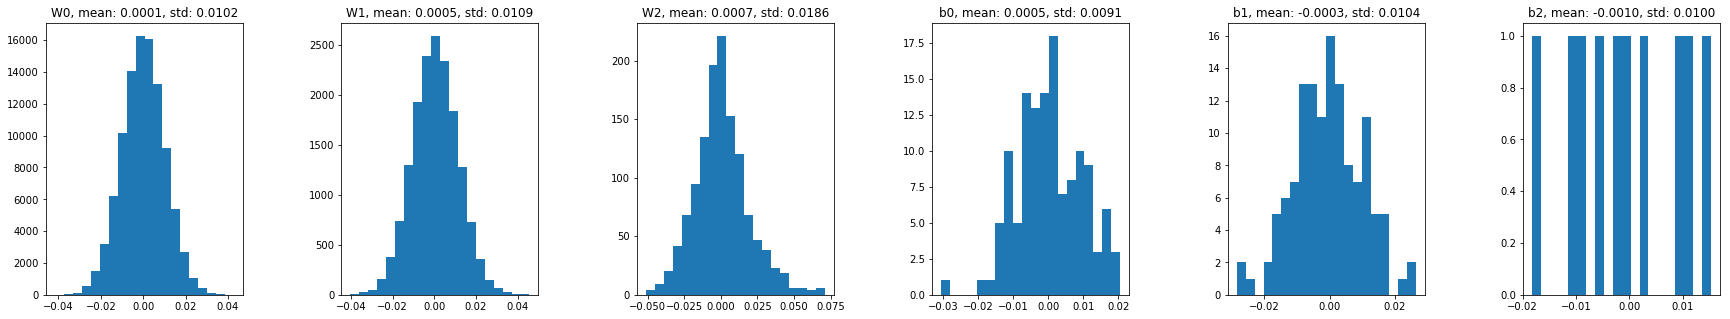


Epoch   1 Completed - Train Error: 0.263086 - Validation Error: 0.268686 - Test Accuracy: 0.922800


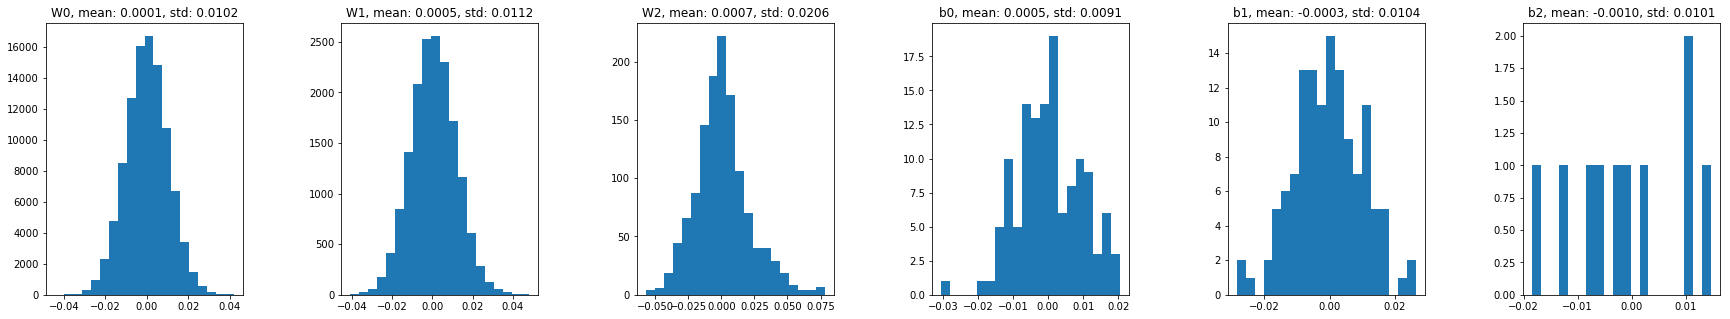


Epoch   2 Completed - Train Error: 0.217805 - Validation Error: 0.218736 - Test Accuracy: 0.935400


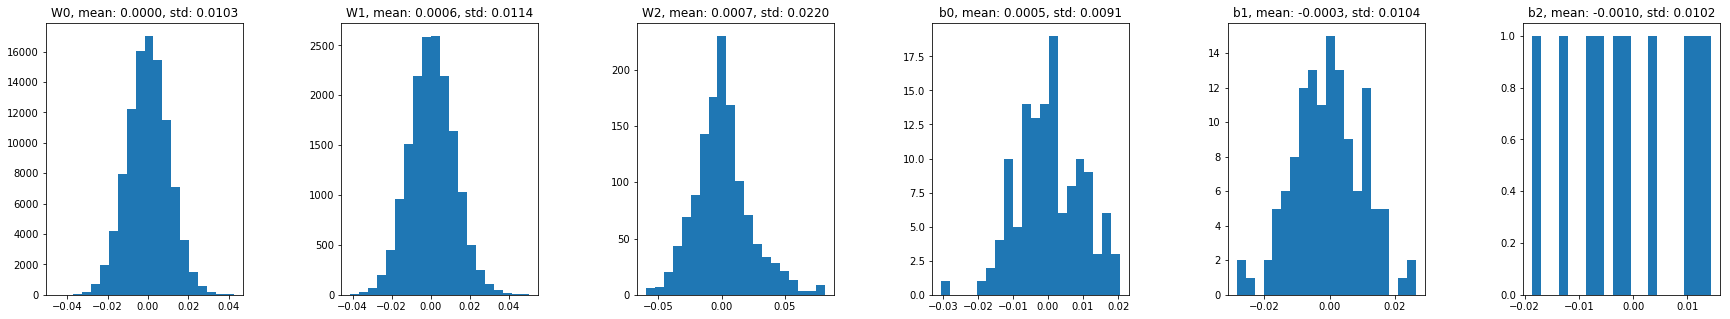


Epoch   3 Completed - Train Error: 0.149120 - Validation Error: 0.186622 - Test Accuracy: 0.942500


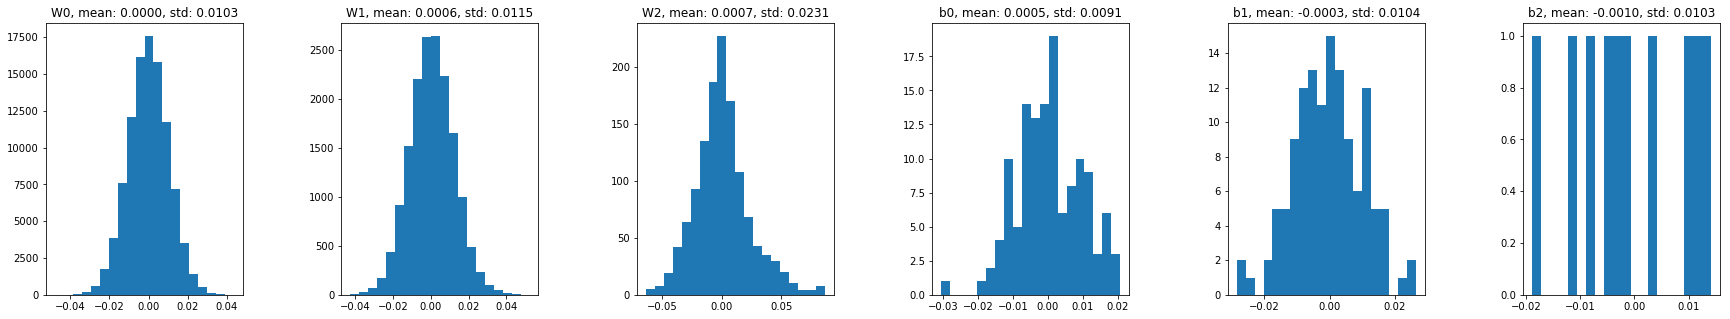

In [ ]:
forward_final_output = n.feed_forward(input_data=data.test_input)
#print(forward_final_output.shape)
print("Initial Accuracy", tff.accuracy(forward_final_output, data.test_target))

n.learning(max_epoch=10, data=data, batch_size=batch_size, print_period=1, verbose=True)

forward_final_output = n.feed_forward(input_data=data.test_input)
print("Post-learning Accuracy", tff.accuracy(forward_final_output, data.test_target))

In [ ]:
n.draw_error_values_and_accuracy(figsize=(20, 5))

In [ ]:
n.draw_false_prediction(data.test_input, data.test_target)